(ch:probability-multivariate)=
# 연속 다변량 분포

**기본 설정**

`numpy`와 `pandas` 라이브러리를 각각 `np`와 `pd`로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`로,
`seaborn`을 `sns`로 불러온다.

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

그래프 스타일을 `seaborn`에서 제공하는 `white` 스타일로 지정한다.

In [6]:
sns.set_style("white")

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [7]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**주요 내용**

연속 다변량 분포의 주요 개념을 소개한다.

- 연속 결합 확률 분포
- 결합 확률 밀도 함수
- 주변 확률 밀도 함수

## 다변량 분포

### 연속 결합 확률 분포

**보스턴 주택가격 데이터셋**

보스턴 주택가격 데이터셋은
1978년에 발표된 미국 보스턴 지녁의 총 506개 구역에서 주택 가격에 영향을 미치는 요소들을 수집한 자료를 담고 있다.
구역별 중위주택가격을 포함해서 총 14가지 특성이 포함된다.

:::{list-table} 보스턴 주택가격 데이터셋의 특성
:widths: 15 55
:header-rows: 1
:name: boston

*   - 특성
    - 의미
*   - <font color=#FF0000>CRIM</font>
    - <font color=#FF0000>구역별 1인당 범죄율</font>
*   - ZN
    - 25000 평방 피트 이상의 주거 구역 비율
*   - INDUS
    - 구역별 비소매 사업지(에이커) 비율
*   - CHAS
    - Charles River 인접 여부
*   - NOX
    - 10ppm 당 일산화 질소 농도
*   - RM
    - 주택 당 평균 방의 개수
*   - AGE
     - 1940년 이전에 건축된 소유주택 비율
*   - DIS
    - 보스턴 고용 센터 다섯 군데까지의 접근성 지수
*   - RAD
    - 방사형 고속도로 접근성 지수
*   - TAX
    - 1만달러 당 재산세율
*   - PTRATIO
    - 구역별 학생 대 교사 비율
*   - <font color=#FF0000>B</font> 
    - <font color=#FF0000>1000(Bk - 0.63)^2 (Bk는구역별 흑인 비율)</font>
*   - <font color=#FF0000>LSTAT</font>
    - <font color=#FF0000>구역별 하위 계층 인구 비율</font>
*   - MEDV
    - 자가 주택 중위가격
:::

**보스턴 주택가격 데이터셋 불러오기**

아래는 보스턴 데이터가 저장된 csv 파일의 처음 10줄이다.
각각의 특성은 2, 3개의 공백으로 구분되어 있으며 특성명은 없다.

```
 0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
 0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
 0.02729   0.00   7.070  0  0.4690  7.1850  61.10  4.9671   2  242.0  17.80 392.83   4.03  34.70
 0.03237   0.00   2.180  0  0.4580  6.9980  45.80  6.0622   3  222.0  18.70 394.63   2.94  33.40
 0.06905   0.00   2.180  0  0.4580  7.1470  54.20  6.0622   3  222.0  18.70 396.90   5.33  36.20
 0.02985   0.00   2.180  0  0.4580  6.4300  58.70  6.0622   3  222.0  18.70 394.12   5.21  28.70
 0.08829  12.50   7.870  0  0.5240  6.0120  66.60  5.5605   5  311.0  15.20 395.60  12.43  22.90
 0.14455  12.50   7.870  0  0.5240  6.1720  96.10  5.9505   5  311.0  15.20 396.90  19.15  27.10
 0.21124  12.50   7.870  0  0.5240  5.6310 100.00  6.0821   5  311.0  15.20 386.63  29.93  16.50
 0.17004  12.50   7.870  0  0.5240  6.0040  85.90  6.5921   5  311.0  15.20 386.71  17.10  18.90
 ```

14개 특성의 특성명은 다음과 같다.

In [8]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                'RM', 'AGE', 'DIS', 'RAD', 'TAX',
                'PTRATIO', 'B', 'LSTAT', 'MEDV']

아래 코드는 특성명 정보를 활용하여 보스턴 주택가격 데이터셋을 데이터프레임으로 불러온다.
`pd.read_csv()` 함수 호출에 사용된 키워드 인자는 다음과 같다.

- `header=None`: 특성명 등 데이터 정보를 포함하는 행의 개수. `None`은 그런 행이 없다은 의미임.
- `delimiter=r'\s+'`: 특성값 구분 문자열 지정. 기본값은 쉼표이지만 여기서는 한 개 이상의 공백 문자로 구성된 문자열을
    가리키는 정규표현식 지정.
- `names`: 특성명을 담은 리스트 또는 어레이 지정.

In [9]:
boston = pd.read_csv(data_url+"boston_housing.csv", 
                     header=None, 
                     delimiter=r'\s+',
                     names=column_names)

In [10]:
boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


<Axes: xlabel='total_bill', ylabel='Density'>

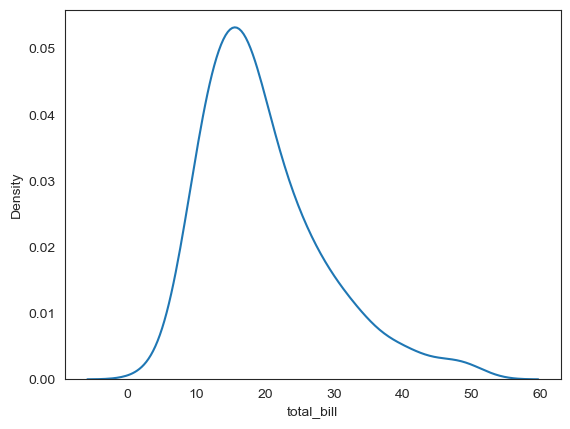

In [11]:
tips = sns.load_dataset("tips")
sns.kdeplot(data=tips, x="total_bill")

In [12]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='waiting', ylabel='duration'>

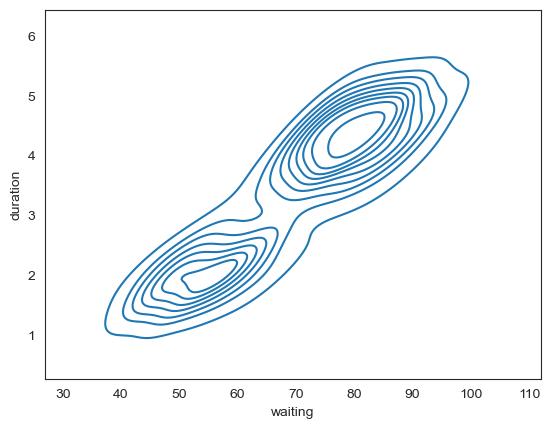

In [13]:
geyser = sns.load_dataset("geyser")
sns.kdeplot(data=geyser, x="waiting", y="duration")

In [14]:
geyser

,duration,waiting,kind
0,3.600,79,long
1,1.800,54,short
2,3.333,74,long
3,2.283,62,short
4,4.533,85,long
...,...,...,...
267,4.117,81,long
268,2.150,46,short
269,4.417,90,long
270,1.817,46,short


## 연습문제

참고: [(연습) 다변량 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-probability_multivariate.ipynb)